In [1]:
import pandas as pd
import os

# Folder containing the CSV files
folder_path = 'result3'

# List to hold dataframes
dfs = []

# Iterate over all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        print(f'Processing {filename}')
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        dfs.append(df)

merged_df = pd.concat(dfs, ignore_index=True)



merged_df.info()

Processing evaluation_results_25.csv
Processing evaluation_results_200.csv
Processing evaluation_results_195.csv
Processing evaluation_results_155.csv
Processing evaluation_results_50.csv
Processing evaluation_results_190.csv
Processing evaluation_results_120.csv
Processing evaluation_results_225.csv
Processing evaluation_results_245.csv
Processing evaluation_results_235.csv
Processing evaluation_results_90.csv
Processing evaluation_results_180.csv
Processing evaluation_results_160.csv
Processing evaluation_results_230.csv
Processing evaluation_results_175.csv
Processing evaluation_results_150.csv
Processing evaluation_results_70.csv
Processing evaluation_results_135.csv
Processing evaluation_results_45.csv
Processing evaluation_results_15.csv
Processing evaluation_results_0.csv
Processing evaluation_results_40.csv
Processing evaluation_results_30.csv
Processing evaluation_results_185.csv
Processing evaluation_results_170.csv
Processing evaluation_results_215.csv
Processing evaluation_

In [2]:
merged_df = merged_df.dropna()

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 0 to 254
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   question                                    251 non-null    object 
 1   self_contained                              251 non-null    bool   
 2   retrieved_relavant_info_rank                251 non-null    float64
 3   retrieved_info                              251 non-null    object 
 4   baseline_response                           251 non-null    object 
 5   finetune_response                           251 non-null    object 
 6   baseline_eval                               251 non-null    object 
 7   finetune_eval                               251 non-null    object 
 8   baseline_with_rag_response                  251 non-null    object 
 9   finetune_with_rag_response                  251 non-null    object 
 10  baseline_with_rag_e

In [3]:
import ast
import eval 

def convert_to_eval_result(eval_str):
    eval_dict = ast.literal_eval(eval_str)
    return eval.EvalResult(eval_dict)


In [4]:
# Extract overall_score from the specified columns and copy the question column

eval_columns = []

for col in merged_df.columns:
    if col.endswith('_eval'):
        eval_columns.append(col)

new_df = merged_df[['question','self_contained', 'retrieved_relavant_info_rank'] +eval_columns ].copy()
new_df[eval_columns] = new_df[eval_columns].applymap(lambda x: convert_to_eval_result(x).overall_score)

# Rename the columns for clarity
new_df.columns = ['question','self_contained', 'retrieved_relavant_info_rank'] + [col.replace('_eval', '_score') for col in eval_columns]

# Update 'retrieved_relavant_info_rank' to True if the value is between 0 and 5
new_df['retrieved_relavant_info_rank'] = new_df['retrieved_relavant_info_rank'].apply(lambda x: True if 0 <=x and x < 5 else False)
# Rename 'retrieved_relavant_info_rank' to 'retrieved_relavant_info'
new_df = new_df.rename(columns={'retrieved_relavant_info_rank': 'retrieved_info'})

print(new_df.head())

                                            question  self_contained  \
0  What factors should be considered when choosin...            True   
1  What is the version range mentioned for the co...           False   
3  How can version updates affect contributors in...            True   
4  What is the purpose of the method that applies...           False   
5  What parameters must be specified when calcula...            True   

   retrieved_info  baseline_score  finetune_score  baseline_with_rag_score  \
0           False             9.0             1.0                      5.0   
1           False             2.0             7.5                      6.0   
3           False             8.0             8.0                      5.0   
4           False             8.0             5.0                      8.5   
5            True             3.0             5.0                      3.5   

   finetune_with_rag_score  Batch-2-Step-60-lr-2e_4_score  \
0                      8.5           

/tmp/ipykernel_20213/2551809221.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  new_df[eval_columns] = new_df[eval_columns].applymap(lambda x: convert_to_eval_result(x).overall_score)


In [5]:
from IPython.display import display

# Group by 'self_contained' and 'retrieved_info' and calculate the mean scores
# Group by 'self_contained' and 'retrieved_info' and calculate the mean scores
display(new_df.drop('question', axis=1).groupby(['self_contained']).mean())

display(new_df.drop('question', axis=1).groupby(['retrieved_info']).mean())

display(new_df.drop('question', axis=1).groupby(['self_contained', 'retrieved_info']).mean())

display(new_df.drop('question', axis=1).mean())

,retrieved_info,baseline_score,finetune_score,baseline_with_rag_score,finetune_with_rag_score,Batch-2-Step-60-lr-2e_4_score,Batch-2-Step-60-lr-2e_4_with_rag_score,Batch-8-Step-183-lr-2e_5_score,Batch-8-Step-183-lr-2e_5_with_rag_score
self_contained,,,,,,,,,
False,0.508772,5.364035,5.550877,6.155263,5.938596,4.078947,5.469298,4.214912,5.656140
True,0.496350,6.446715,6.448905,6.370073,6.169343,4.923358,5.730657,5.302920,6.016058


,self_contained,baseline_score,finetune_score,baseline_with_rag_score,finetune_with_rag_score,Batch-2-Step-60-lr-2e_4_score,Batch-2-Step-60-lr-2e_4_with_rag_score,Batch-8-Step-183-lr-2e_5_score,Batch-8-Step-183-lr-2e_5_with_rag_score
retrieved_info,,,,,,,,,
False,0.552000,6.092000,6.256000,5.932000,5.616000,4.528000,5.49680,4.932000,5.630400
True,0.539683,5.819048,5.827778,6.610317,6.509524,4.551587,5.72619,4.686508,6.073016


baseline_score  finetune_score  \
self_contained retrieved_info                                   
False          False                 5.258929        5.848214   
               True                  5.465517        5.263793   
True           False                 6.768116        6.586957   
               True                  6.120588        6.308824   

                               baseline_with_rag_score  \
self_contained retrieved_info                            
False          False                          5.678571   
               True                           6.615517   
True           False                          6.137681   
               True                           6.605882   

                               finetune_with_rag_score  \
self_contained retrieved_info                            
False          False                          5.366071   
               True                           6.491379   
True           False                          5.818841   
               True                           6.525000   

                               Batch-2-Step-60-lr-2e_4_score  \
self_contained retrieved_info                                  
False          False                                3.982143   
               True                                 4.172414   
True           False                                4.971014   
               True                                 4.875000   

                               Batch-2-Step-60-lr-2e_4_with_rag_score  \
self_contained retrieved_info                                           
False          False                                         5.401786   
               True                                          5.534483   
True           False                                         5.573913   
               True                                          5.889706   

                               Batch-8-Step-183-lr-2e_5_score  \
self_contained retrieved_info                                   
False          False                                 3.973214   
               True                                  4.448276   
True           False                                 5.710145   
               True                                  4.889706   

                               Batch-8-Step-183-lr-2e_5_with_rag_score  
self_contained retrieved_info                                           
False          False                                          5.469643  
               True                                           5.836207  
True           False                                          5.760870  
               True                                           6.275000

self_contained                             0.545817
retrieved_info                             0.501992
baseline_score                             5.954980
finetune_score                             6.041036
baseline_with_rag_score                    6.272510
finetune_with_rag_score                    6.064542
Batch-2-Step-60-lr-2e_4_score              4.539841
Batch-2-Step-60-lr-2e_4_with_rag_score     5.611952
Batch-8-Step-183-lr-2e_5_score             4.808765
Batch-8-Step-183-lr-2e_5_with_rag_score    5.852590
dtype: float64

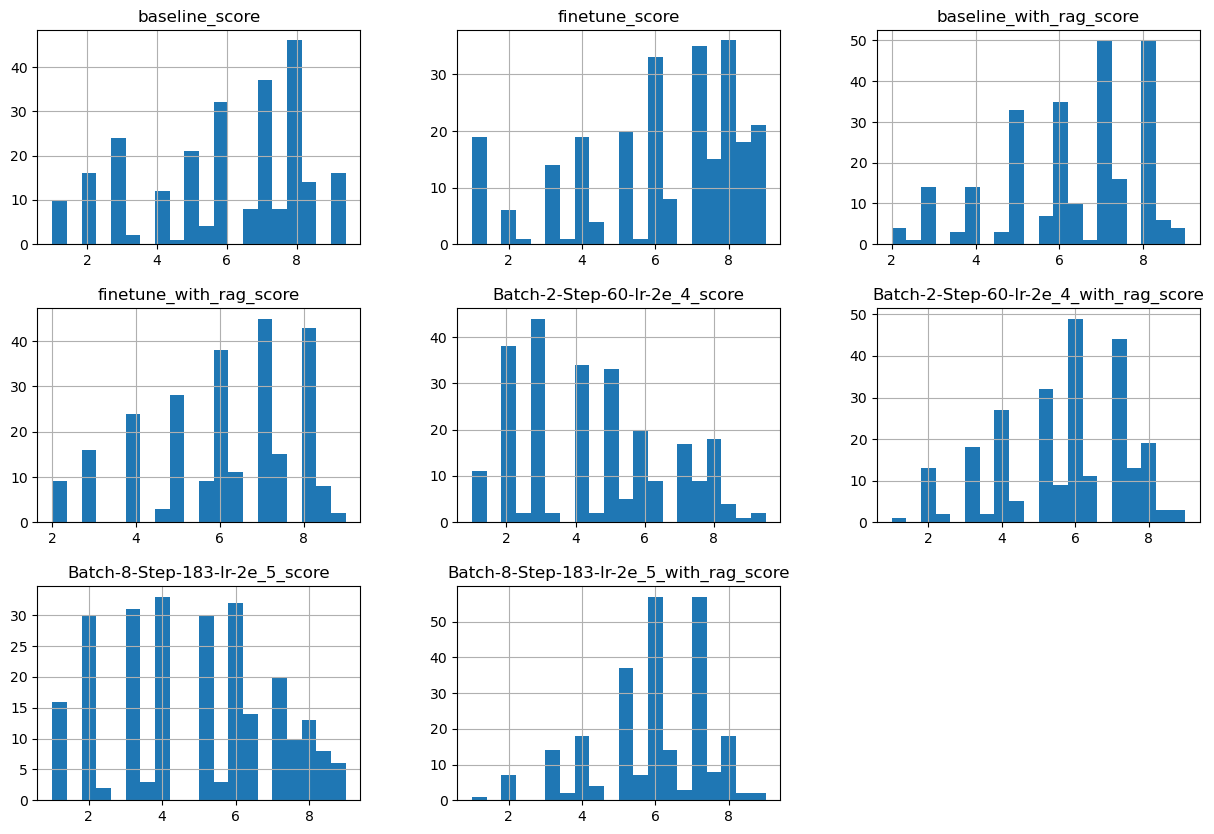

In [8]:
import matplotlib.pyplot as plt

# Plot the distribution of each column
new_df.hist(bins=20, figsize=(15, 10))
plt.show()